## Scikit-learn

In [51]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import plotDecisionRegions
%reload_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

`from sklearn.cross_validation import train_test_split`

已经被替代为

`from sklearn.model_selection import train_test_split`

### 初步使用
读取数据

In [52]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

划分数据集

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

数据预处理

In [54]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

训练感知器

In [55]:
ppn = Perceptron(max_iter=40,tol=1e-3,eta0=0.1,random_state=0)
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=40, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

预测数据

In [56]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: {}'.format(np.sum(y_test!=y_pred)))

Misclassified samples: 4


使用准确率来评判模型

In [57]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)))

Accuracy: 0.91


绘制决策区域

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


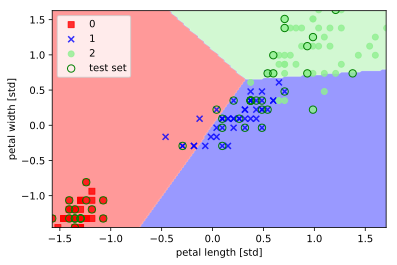

In [58]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plotDecisionRegions.plot_decision_regions(X=X_combined_std,y=y_combined,
                                         classifier=ppn,test_idx=range(105,150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')

## 逻辑斯谛回归

sigmoid函数作为激励函数
$\phi(z)=\frac{1}{1+e^{-z}}$

绘制介于区间[-7,7]的sigmoid函数

Text(0, 0.5, '$\\phi(z)$')

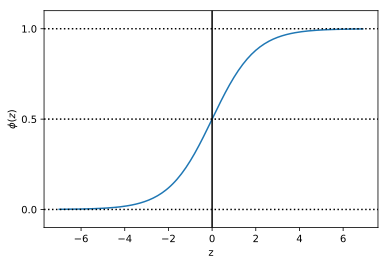

In [59]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.axhspan(0.0,1.0,facecolor='1.0',alpha=1.0,ls='dotted')
plt.axhline(y=0.5,ls='dotted',color='k')
plt.axhline(y=0.0,ls='dotted',color='k')
plt.axhline(y=1.0,ls='dotted',color='k')
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi(z)$')

使用scikit-learn训练逻辑斯谛回归模型

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000,random_state=0)
lr.fit(X_train_std,y_train)

D:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


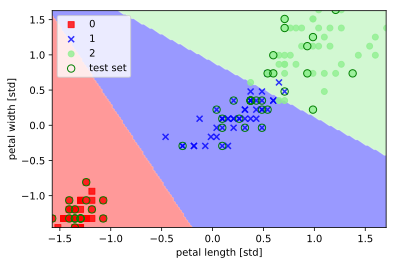

In [61]:
plotDecisionRegions.plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')

通过predict_proba方法来预测样本属于某一类别的概率

In [65]:
lr.predict_proba(X_test_std[0,:].reshape(1,2))

array([[1.78177322e-11, 6.12453348e-02, 9.38754665e-01]])

为了防止模型出现过拟合,我们通常通过正则化来解决拟合问题

最常用的正则化形式称为L2正则化
\begin{equation}
\frac{\lambda}{2}\|w\|^2=\frac{\lambda}{2}\sum_{j=1}^{m}w_j^2
\end{equation}


我们只需要在逻辑斯谛回归模型的代价函数加入上述正则化项,来降低回归系数带来的副作用,增加$\lambda$的值,可以增强正则化的强度

前面训练模型用到的参数C则是正则化系数的倒数
$$C=\frac{1}{\lambda}$$

减小正则化参数倒数C的值相当于增加正则化的强度，这可以通过绘制对两个权重系数进行L2正则化后的图像予以展示：

D:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

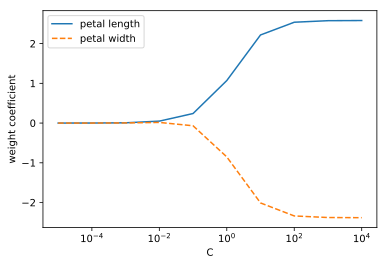

In [71]:
weights,params=[],[]
for c in [10**c for c in np.arange(-5,5, dtype=float)]:
    lr = LogisticRegression(C=c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(c)
weights=np.array(weights)
plt.plot(params,weights[:,0],label='petal length')
plt.plot(params,weights[:,1],label='petal width',linestyle='--')
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.legend(loc='upper left')
plt.xscale('log')